In [1]:
import numpy as np
import pyDOE as doe
import pandas as pd
import math
from DataSampling import samplers
import os

# Definition of features to sample
par_names = ['L', 'B', 'E', 'ms_fac', 'F', 's', 't', 'nl', 'nu']        # L, B in [cm]; E in [GPa]; ms_fac in [-]; F in [kN]; s in [-]; t in [m]; nl in [-]; nu in [-]
min = [10, 10, 210, 0.05, 20, 4, 0.03, 20, 0.3]
max = [100, 100, 210, 0.5, 30, 4, 0.2, 20, 0.3]
samples = 1800
criterion = 'c'                                         # can be 'c', 'm', 'cm' or 'corr' (see here: https://pythonhosted.org/pyDOE/randomized.html)


# Choosing sampler and sampling, converting to numpy array
lhs_sampler = samplers(par_names, min, max, samples, criterion) 
data = lhs_sampler.lhs()
np_data = data.to_numpy()

# Processing to correct units
np_data[:,0] = [round(num,1) for num in np_data[:,0]]
np_data[:,1] = [round(num,1) for num in np_data[:,1]]
np_data[:,0:2] = np_data[:,0:2]*10                                          # in mm as required for the program later
np_data[:,2] = np_data[:,2]*1000                                            # in MPa as required for the program later
np_data[:,4] = [round(num,1) for num in np_data[:,4]]
np_data[:,4] = -np_data[:,4]*1000                                           # in N as required for the program later
for i in range(samples): 
    if np_data[i,4] == 0:
        np_data[i,4] = 1
# np_data[:,5] = [round(num,0) for num in np_data[:,5]]
# np_data[:,5] = np_data[:,5]*2                                               # to only get scenarios 4 and 6 (when min = 2, max = 3)
np_data[:,6] = [round(num,2) for num in np_data[:,6]]
np_data[:,6] = np_data[:,6]*1000                                             # in mm as required for the program later

#convert data type to float
np_data = np.array(list(np_data), dtype=np.float64)

C:\Users\vbalmer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
np.set_printoptions(suppress=True,precision=3)
print(np_data[0:10,:])

[[   102.       350.    210000.         0.38  -24000.         4.
     160.        20.         0.3  ]
 [   469.       643.    210000.         0.281 -29800.         4.
      70.        20.         0.3  ]
 [   174.       841.    210000.         0.367 -25300.         4.
     180.        20.         0.3  ]
 [   565.       477.    210000.         0.106 -20600.         4.
      70.        20.         0.3  ]
 [   178.       996.    210000.         0.265 -23900.         4.
     180.        20.         0.3  ]
 [   343.       637.    210000.         0.074 -24200.         4.
      70.        20.         0.3  ]
 [   792.       122.    210000.         0.122 -28000.         4.
     170.        20.         0.3  ]
 [   888.       313.    210000.         0.261 -24000.         4.
      40.        20.         0.3  ]
 [   519.       893.    210000.         0.275 -28000.         4.
      40.        20.         0.3  ]
 [   572.       765.    210000.         0.073 -25200.         4.
     170.        20.      

In [3]:
# Data properties
print(np_data.shape)
np_data.dtype

(1800, 9)


dtype('float64')

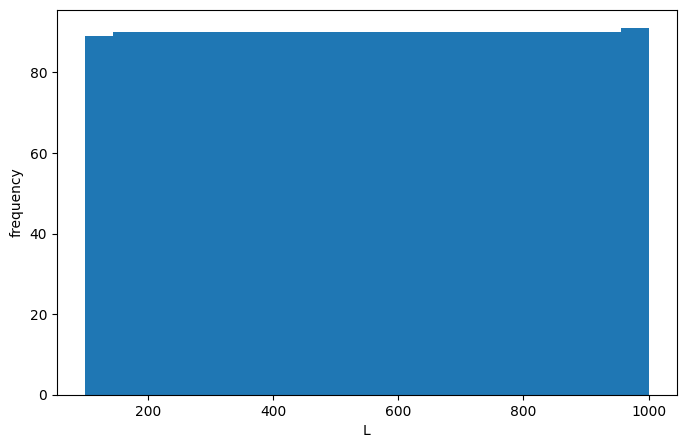

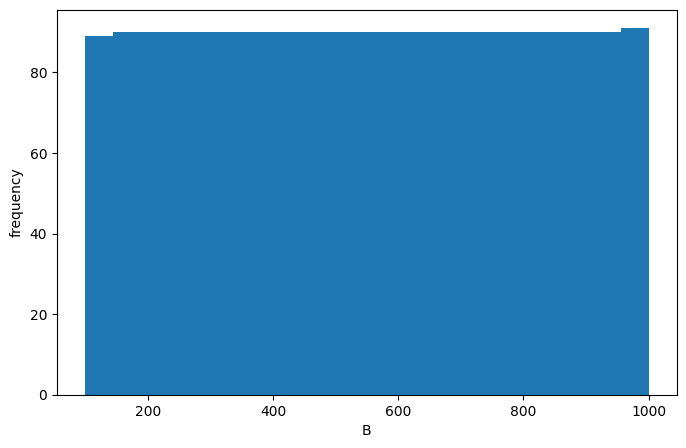

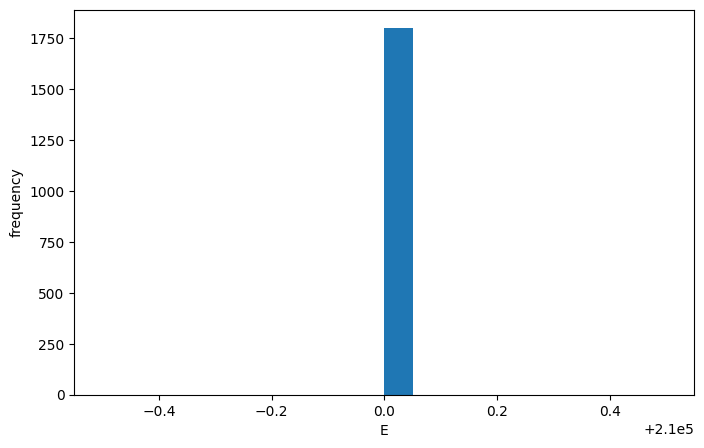

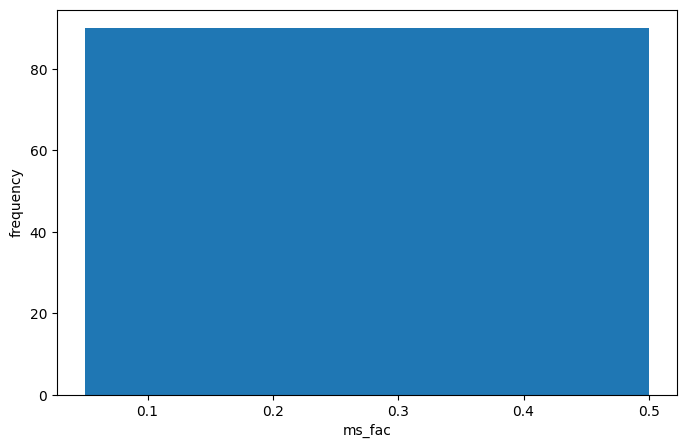

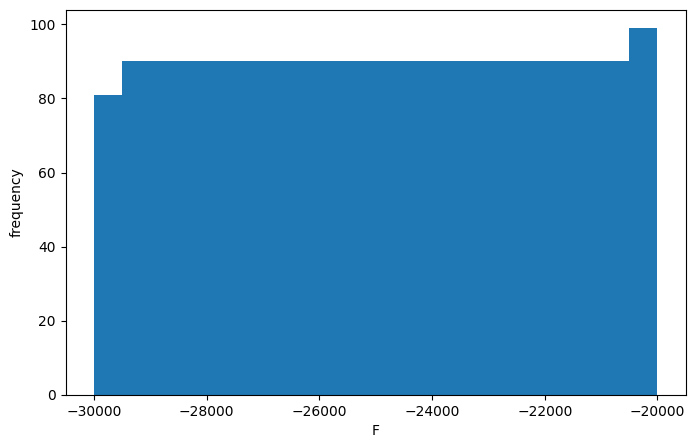

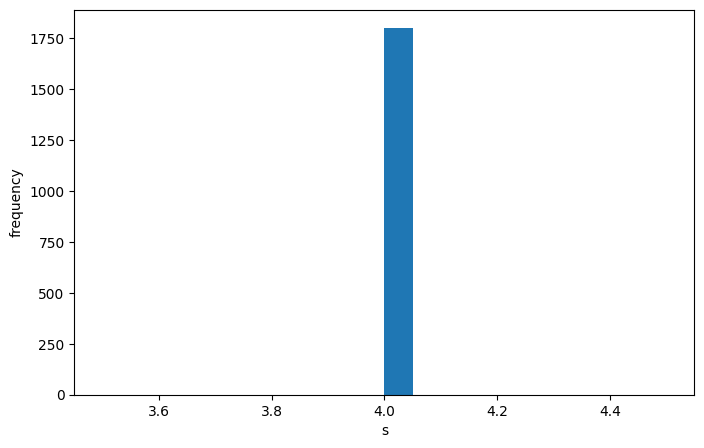

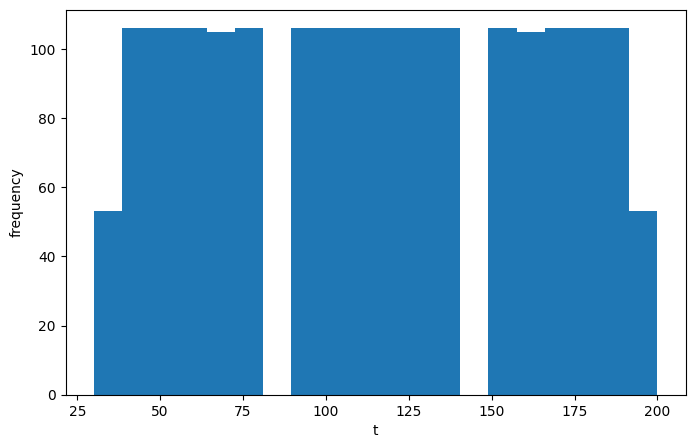

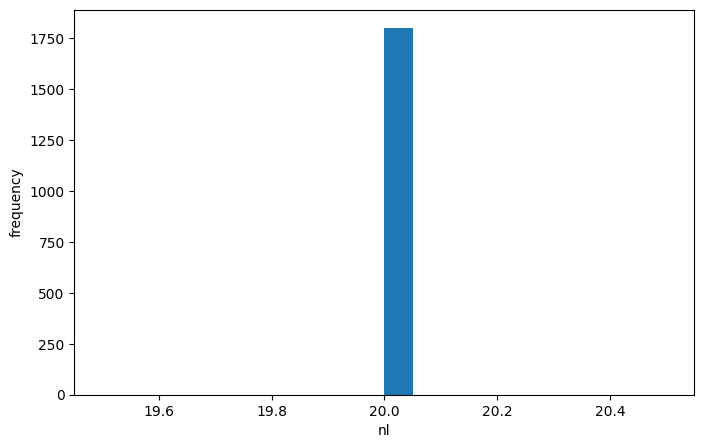

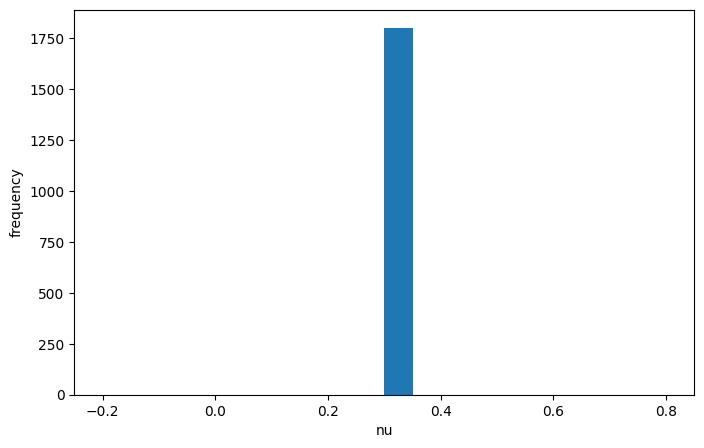

In [4]:
# Plotting histograms of sampled distributions

from DataSampling import plots
plot1 = plots(1)
path = r"C:\Users\vbalmer\Documents\GitHub\ShellSim\02_Simulator\Simulator\plots\input"

for i in range(np_data.shape[1]):
    plot1.histogram(np_data[:,i], 20, par_names[i], path)

In [5]:
## Changes to the data set, that might be adjusted later:

# Adding meshsize data, (simplified to L/2): 
# factor_x = 0.5
# np_data_extended = np.zeros((np_data.shape[0],np_data.shape[1]+1))
# np_data_extended[:,0:np_data.shape[1]] = np_data
# np_data_extended[:,np_data.shape[1]] = factor_x*(np_data[:,0])

# Adding meshsize data, for sampled mesh size
np_data_extended = np_data
np_data_extended[:,3] = np_data[:,0]*np_data[:,3]


# Making plates square (i.e. ignoring the sampled B, setting B = L, s.t. the elements have sizes of LxL):

np_data_extended[:,1] = np_data_extended[:,0]


print(np_data_extended)
print(np_data_extended.shape)

[[   102.     102.  210000.  ...    160.      20.       0.3]
 [   469.     469.  210000.  ...     70.      20.       0.3]
 [   174.     174.  210000.  ...    180.      20.       0.3]
 ...
 [   543.     543.  210000.  ...    150.      20.       0.3]
 [   208.     208.  210000.  ...    180.      20.       0.3]
 [   480.     480.  210000.  ...    150.      20.       0.3]]
(1800, 9)


In [6]:
# Saving data 

np.save('outfile', np_data_extended)